# Text Preprocessing with Keras

In [1]:
# imports

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor

## Tokenization

In [2]:
sentences = [
    'The quick brown fox jumps over the lazy dog.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
train_sequence = tokenizer.texts_to_sequences(sentences)
print(train_sequence)

[[1, 2, 3, 4, 5, 6, 1, 7, 8]]


In [3]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [4]:
test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'Dog and the fox.',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
Dog and the fox. [8, 1, 4]
Hello, world! []


## Padding Sequences

In [5]:
[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [6]:
max([len(sentence) for sentence in encoded_sentences])

9

In [7]:
MAX_SEQUENCE_LENGTH = 9

In [8]:
X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Embedding Layer

In [9]:
Embedding?

Init signature: Embedding(*args, **kwargs)
Docstring:     
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used as the first layer in a model.

Example:

>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
>>> # The model will take as input an integer matrix of size (batch,
>>> # input_length), and the largest integer (i.e. word index) in the input
>>> # should be no larger than 999 (vocabulary size).
>>> # Now model.output_shape is (None, 10, 64), where `None` is the batch
>>> # dimension.
>>> input_array = np.random.randint(1000, size=(32, 10))
>>> model.compile('rmsprop', 'mse')
>>> output_array = model.predict(input_array)
>>> print(output_array.shape)
(32, 10, 64)

Arguments:
  input_dim: Integer. Size of the vocabulary,
    i.e. maximum integer index + 1.
  output_dim: Integer. Dimension of the dense embedding.
  embeddings_initializer: I

In [10]:
embedding = Embedding(input_dim=MAX_SEQUENCE_LENGTH, output_dim=128)

In [11]:
X.shape

(6, 9)

In [12]:
X_embedded = embedding(X)

In [13]:
X_embedded.shape

TensorShape([6, 9, 128])

In [14]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[ 0.04612789,  0.00374259,  0.02797997, ...,  0.04021947,
          0.01416836,  0.03016007],
        [ 0.03783206,  0.03262481, -0.00312804, ..., -0.01118555,
          0.00936069, -0.00772642],
        [ 0.01541359,  0.04377149, -0.00301906, ...,  0.01528272,
          0.02077079, -0.00777879],
        ...,
        [ 0.04612789,  0.00374259,  0.02797997, ...,  0.04021947,
          0.01416836,  0.03016007],
        [-0.00273396,  0.03133656,  0.03248702, ..., -0.03422379,
         -0.04201932, -0.00935528],
        [-0.04958761, -0.04717213, -0.01351572, ...,  0.01932955,
         -0.02964882,  0.02385651]],

       [[ 0.00688528, -0.01659409, -0.00109921, ...,  0.03158918,
         -0.0051579 ,  0.00921216],
        [ 0.00688528, -0.01659409, -0.00109921, ...,  0.03158918,
         -0.0051579 ,  0.00921216],
        [ 0.00688528, -0.01659409, -0.00109921, ...,  0.03158918,
         -0.0051579 ,  0.00921216],
        ...,
 

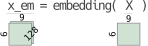

In [15]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    x_em = embedding(X)

In [16]:
X.shape

(6, 9)

In [17]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

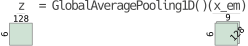

In [18]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(x_em)

In [19]:
z.shape

TensorShape([6, 128])